#  Intuitive Web App
## Data visualisation for salinity overlaid with sea water velocity 

- **Dataset ID for salinity** : EO:MO:DAT:GLOBAL_ANALYSISFORECAST_PHY_CPL_001_015
- **Start date - end date** : 12/01/2020 - 12/31/2020
- **Start depth - end depth** : 3 m - 15 m
- **Location** : Eastern Coast of Greenland [-24.3 W, 67.9 S, 2.70 E, 83.7 N]


In [36]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt

fns = netCDF4.Dataset('./data/northwardvel.nc')
few = netCDF4.Dataset('./data/eastwardvel.nc')
fsal = netCDF4.Dataset('./data/salinity.nc')

In [37]:
x, y, ewct, nsct = np.asarray(few.variables["longitude"][:]), np.asarray(few.variables["latitude"][:]), np.asarray(few.variables["uo"][:])[:, 0, :, :], np.asarray(fns.variables["vo"][:])[:, 0, :, :]
sal = np.asarray(fsal.variables["so"][:])[:, 0, :, :]

In [38]:
ind = np.where(ewct > 10**5)
ewct[ind] = 0

ind = np.where(nsct > 10**5)
nsct[ind] = 0

ind = np.where(sal < 0)
sal[ind] = 0

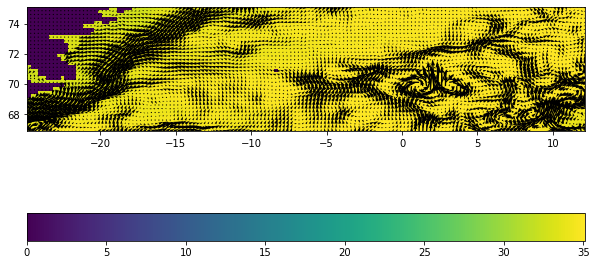

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
colormap = ax.imshow(sal[0, 1:, 1:], extent=[x[0],x[-1],y[0],y[-1]], origin='lower') # on 12/31
plt.colorbar(colormap, orientation="horizontal")
ax.quiver(x, y, ewct[0, :, :], nsct[0, :, :]) # on 12/01

plt.show()
plt.close(fig)

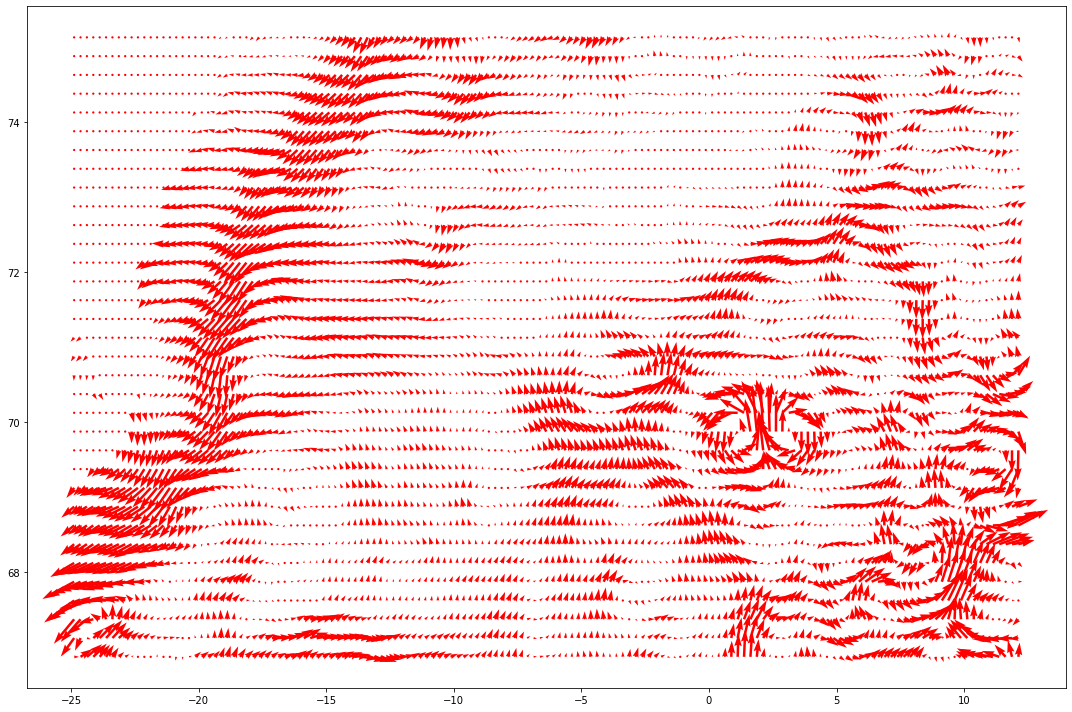

In [40]:
%matplotlib inline
from matplotlib import animation, rcParams
from IPython.core.display import display,HTML
rcParams['animation.writer'] = 'ffmpeg'


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
Q = ax.quiver(x, y, ewct[0, :, :], nsct[0, :, :], color='r')

ewct_frame = [ewct[i, :, :] for i in range(1,30)]
nsct_frame = [ewct[i, :, :] for i in range(1,30)]

def update_quiver(frame):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    Q.set_UVC(x, y, ewct[frame, :, :], nsct[frame, :, :])

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, frames=30, interval=1)
fig.tight_layout()
plt.show()

In [41]:
HTML(anim.to_html5_video())
#plt.rcParams["animation.html"] = "jshtml"


TypeError: set_UVC() takes from 3 to 4 positional arguments but 5 were given

## Next step
- Study the relationship between salinity and current velocity using either neural network or a mathematical model 
- Study the impact of ocean currents upon migration routes (make improvement on exisiting stochastic models) --> enhance the deterministic component such as narrowing down the vast variety of migration tracks (https://doi.org/10.1007/s12080-020-00469-4).
    - Certain animals can use ocean currents to navigate to and from breeding or feeding grounds.  Some eggs, larvae, and young fish drift passively with ocean currents. Hence, the ability to understand and predict ocean dynamics is instrumental in protecting marine wildlife.
    - Prediction of current velocity plays a pivotal role in determining optimal routes for vessels (This feature can be added to the web app where the user can put in depature and arrival locations and an optimized route is calculated based on current velocity)--> marine navigation
    - Debris accumulation due to ocean current --> garbage patches 
- Potential end user: wildlife cconservation organizations, fisheries control agency, shipping companies
